In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import Dict
import json

In [3]:
df_db_tracks = pd.read_csv('../dataset/tracks.csv')
df_db_tracks['id_artists'] = df_db_tracks['id_artists'].apply(lambda x: x[1:-1].strip().replace("'", "").split(','))
df_db_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],[1QLBXKM5GCpyQQSVMNZqrZ],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],[1dy5WNgIKQU6ezkpZs4y8z],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],[37M5pPGs6V1fchFJSgCguX],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [4]:
df_db_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
df_db_artists = pd.read_csv('../dataset/artists.csv')
df_db_artists['genres'] = df_db_artists['genres'].apply(lambda x: x[1:-1].strip().replace("'", "").split(','))
df_db_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,[black comedy],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,[black comedy],Donnell Rawlings,15


Join Tracks table with artists table in order to bring the Genre information and Artist popularity, in the track schema

In [6]:
artist_information = df_db_artists.set_index('id').to_dict(orient='index')

In [7]:
from typing import List

def get_genres_for_artists(id_artists: List[str]) -> List[str]:
    genres = []
    for artist_id in id_artists:
        genres += artist_information[artist_id]['genres'] if artist_id in artist_information.keys() else []
    return list(set(genres))


def get_popularity_for_artists(id_artists: List[str]) -> List[int]:
    popularity = []
    for artist_id in id_artists:
        popularity += [artist_information[artist_id]['popularity']] if artist_id in artist_information.keys() else []
    return popularity


In [8]:
df_db_tracks['genres'] = df_db_tracks['id_artists'].apply(lambda x: get_genres_for_artists(x))

In [9]:
df_db_tracks['artist_popularity'] = df_db_tracks['id_artists'].apply(lambda x: get_popularity_for_artists(x))
df_db_tracks['artist_mean_popularity'] = df_db_tracks['artist_popularity'].apply(lambda x: np.mean(x) if len(x) > 0 else np.nan)
df_db_tracks['artist_max_popularity'] = df_db_tracks['artist_popularity'].apply(lambda x: np.max(x) if len(x) > 0 else np.nan)

In [10]:
df_db_tracks['release_date'] = pd.to_datetime(df_db_tracks['release_date'])
df_db_tracks['track_age'] = df_db_tracks['release_date'].apply(lambda x: (datetime.today() - x).total_seconds()//(365*24*3600))

In [11]:
df_db_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_mean_popularity,artist_max_popularity,track_age
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,574812.000000,574812.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,50.680826,50.680826,33.551560
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,19.959986,19.959986,23.051882
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,38.000000,38.000000,15.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,52.000000,52.000000,30.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,65.000000,65.000000,48.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,100.000000,100.000000,123.000000


In [12]:
df_db_tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,genres,artist_popularity,artist_mean_popularity,artist_max_popularity,track_age
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.445,...,0.7440,0.151,0.127,104.851,3,[],[4],4.0,4.0,100.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.263,...,0.0000,0.148,0.655,102.009,1,[],[0],0.0,0.0,100.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.177,...,0.0218,0.212,0.457,130.418,5,"[tango, vintage tango]",[23],23.0,23.0,100.0


1. **GENRE** TF IDF vector on genres
2. **SONG AGE** MinMax Scaler based on track age (1 newest, 0 oldest) -- possibly use bins for this
3. **TEMPO** Tempo MinMax Scaler
4. **POPULARITY** Popularity in range 0-1 (1 most popular, 0 least popular)
5. **TRACK AUDIO FEATURES** scaled either MinMax or Standard

#### TF - IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

import re

In [14]:
custom_vocab = ["piano", "guitar", "rock", "metal", "pop", "folk", "country", "dance", "vintage", "tango", "latin", "classic", "jazz", "lounge", "easy", "blues", "electronic", "ballad", \
    "indie", "electropop", "soul", "comedy", "rap", "alternative", "reggaeton", "reggae", "trap", "punk", "techno", "vocal", "soundtrack", "epic", "house", "deep", \
    "garage", "hiphop", "rb", "uk", "us", "polish", "french", "russian", "edm", "chill", "samba", "downtempo", "greek", "drill", "czsk"]

In [15]:
def process_genre(genre: str) -> str:
    new_genre = genre.replace('hip hop', 'hiphop')
    new_genre = genre.replace('r&b', 'rb')
    return new_genre.strip()

In [16]:
tfidf = TfidfVectorizer(max_features=300)

vocab = list(set([process_genre(genre) for genres in df_db_tracks['genres'].to_list() for genre in genres]))

tfidf = tfidf.fit(vocab)

In [17]:
# example
tfidf.transform(['easy pop folk pop pop guitar']).toarray().shape

(1, 300)

In [18]:
genres_text = [" ".join([process_genre(genre) for genre in track_genres]) for track_genres in df_db_tracks['genres'].to_list()]

tracks_genres = tfidf.transform(genres_text).toarray()

df_db_track_with_genres = pd.DataFrame(tracks_genres, columns=tfidf.get_feature_names_out())
df_db_track_with_genres['id'] = df_db_tracks['id'].to_list()
df_db_track_with_genres.set_index('id', inplace=True)
df_db_track_with_genres

,acid,acoustic,african,afro,afrobeat,alternative,ambient,american,americana,and,...,venezuelan,vintage,viral,vocal,wave,welsh,west,western,world,worship
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
021ht4sdgPcrDgSk7JTbKY,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07A5yehtSnoedViJAZkNnc,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.37445,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08FmqUhxtyLTn6pAh6bk45,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.37445,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08y9GfoqCWfOGsKdwojr5e,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5rgu12WBIHQtvej2MdHSH0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.707889,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0NuWgxEp51CutD2pJoF4OM,0.0,0.0,0.0,0.0,0.0,0.307382,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27Y1N4Q4U3EfDU5Ubw8ws2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaled_features = [
    'track_age',
    'tempo',
    'popularity',
    'valence',
    'energy',
    'loudness',
    'danceability',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'artist_mean_popularity'
]

scalers: Dict[str, MinMaxScaler] = {}

for feature in scaled_features:
    scalers[feature] = MinMaxScaler()
    tempo_array = df_db_tracks[feature].to_numpy()
    tempo_array = tempo_array.reshape(-1,1)
    df_db_track_with_genres[feature] = scalers[feature].fit_transform(tempo_array)

Algorithm steps:
1. Get X playlists
2. Get all tracks from X playlists
3. Construct the above features for Y tracks
4. Hierarchical clustering to construct K clusters
5. Use the centroid of each cluster and do K-NN to find similar tracks

In [21]:
from recommender_system.algorithm.nn_recommender import NearestNeighborsRecommender
from recommender_system.algorithm.profile_creator import ProfileCreator

In [22]:
profile_creator = ProfileCreator()
nn = NearestNeighborsRecommender()

In [23]:
enhanced_tracks = nn._spotify_web_api.get_playlist_tracks_with_audio_features(
    playlist_id='0OHx2BNf1Heu8EcGoQqRBD'
)
enhanced_tracks = nn._spotify_web_api.enhance_tracks_with_artist_information(enhanced_tracks)

In [24]:
enhanced_tracks_processed = []

for track in enhanced_tracks:
    
    processed_track = {
        'id': track.id,
        'popularity': track.popularity, 
        'genres': [genre for artist in track.artists for genre in artist.genres or []],
        'release_date': track.album.release_date,
        'artist_mean_popularity': np.mean([artist.popularity for artist in track.artists]) if len([artist.popularity for artist in track.artists]) > 0 else None
    }

    for key, value in track.audio_features.__dict__.items():
        processed_track[key] = value
    
    enhanced_tracks_processed.append(processed_track)


df_track_pool = pd.json_normalize(enhanced_tracks_processed)
df_track_pool['release_date'] = pd.to_datetime(df_track_pool['release_date'])
df_track_pool['track_age'] = df_track_pool['release_date'].apply(lambda x: (datetime.today() - x).total_seconds()//(365*24*3600))
df_track_pool.head(2)

,id,popularity,genres,release_date,artist_mean_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_age
0,1veoLuuMcaSn6rPACuG52I,32.0,"[indie soul, electropop, indie electropop, strut]",2016-11-04,27.0,0.637,0.790,1,-7.785,0,0.0424,0.00557,0.20900,0.0682,0.584,121.997,319918,4,6.0
1,2s1AhFYnZAtSU5rk4lvwB7,50.0,"[electropop, new french touch, tropical house,...",2018-04-27,50.0,0.655,0.427,2,-11.684,0,0.0799,0.29500,0.00108,0.0788,0.224,107.992,215446,4,4.0


In [25]:
genres_text = [" ".join([process_genre(genre) for genre in track_genres]) for track_genres in df_track_pool['genres'].to_list()]

tracks_genres = tfidf.transform(genres_text).toarray()

df_track_pool_with_genres = pd.DataFrame(tracks_genres, columns=tfidf.get_feature_names_out())
df_track_pool_with_genres['id'] = df_track_pool['id'].to_list()
df_track_pool_with_genres.set_index('id', inplace=True)

for feature in scaled_features:
    tempo_array = df_track_pool[feature].to_numpy()
    tempo_array = tempo_array.reshape(-1,1)
    df_track_pool_with_genres[feature] = scalers[feature].transform(tempo_array)

df_track_pool_with_genres.head(2)

,acid,acoustic,african,afro,afrobeat,alternative,ambient,american,americana,and,...,popularity,valence,energy,loudness,danceability,speechiness,acousticness,instrumentalness,liveness,artist_mean_popularity
id,,,,,,,,,,,,,,,,,,,,,
1veoLuuMcaSn6rPACuG52I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.32,0.584,0.790,0.798688,0.642785,0.043666,0.005592,0.20900,0.0682,0.27
2s1AhFYnZAtSU5rk4lvwB7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.224,0.427,0.739048,0.660949,0.082286,0.296185,0.00108,0.0788,0.50


#### Clustering

In [26]:
pd.set_option('display.max_columns', 500)

In [27]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.1, metric='cosine', min_samples=5)

cluster_result = clustering.fit_predict(df_track_pool_with_genres.to_numpy())
df_track_pool_with_genres['cluster'] = cluster_result

In [28]:
df_track_pool_with_genres['cluster'].value_counts()

-1    30
 0    20
Name: cluster, dtype: int64

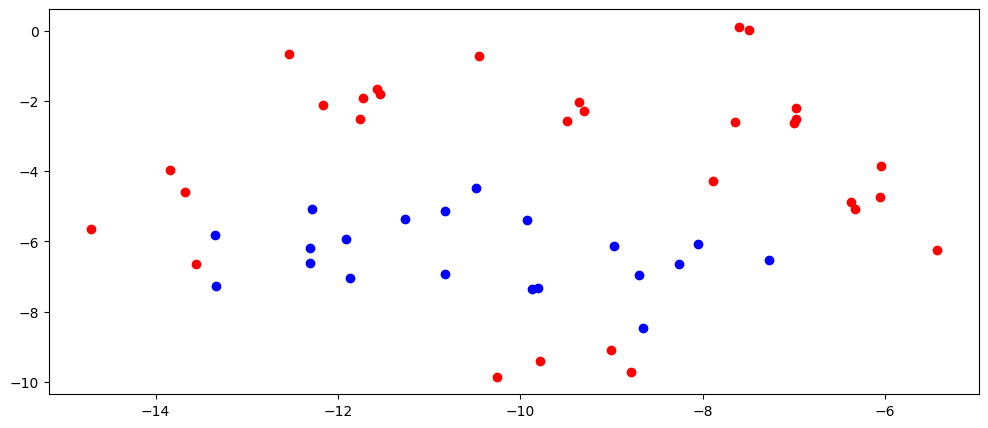

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def tsne_plot():
    "Creates and TSNE model and plots it"
    tokens = []
    labels = []
    color_mapper = {
        -1: 'red',
        0: 'blue',
        1: 'green',
        2: 'yellow'
    }

    data = df_track_pool_with_genres.to_dict(orient='records')

    for record in data:
        cluster = record.pop('cluster')
        labels.append(color_mapper[cluster])
        tokens.append(np.array(list(record.values())))
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12,5)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=labels[i])

    plt.show()


tsne_plot()

#### Nearest Neighbors
Use KNN to find similar tracks for each cluster centroid

In [30]:
centroids = df_track_pool_with_genres.groupby('cluster').mean()
centroids

,acid,acoustic,african,afro,afrobeat,alternative,ambient,american,americana,and,anime,arab,argentine,argentino,atmospheric,australian,austrian,band,baroque,bass,beat,beats,belarusian,belgian,big,black,bluegrass,blues,boston,brasileira,brasileiro,brass,brazilian,british,bulgarian,cabaret,canadian,carolina,catala,ccm,celtic,chamber,chanson,chant,chicago,childrens,chilean,chilena,chileno,chill,chinese,choir,christian,city,classic,classical,coast,colombian,colombiana,colombiano,comedy,contemporary,cosmic,country,cover,cristiano,croatian,cubano,cumbia,czech,dance,dancehall,danish,dark,de,death,deathcore,deep,detroit,devotional,disco,disney,dnb,doom,dream,drill,drone,dub,dubstep,dutch,early,east,edm,electro,electronic,electronica,electropop,emo,en,ensemble,era,espanol,estonian,experimental,faroese,fi,fiddle,finnish,flamenco,flute,folclore,folk,folklore,forro,francais,french,funk,fusion,future,garage,gaucho,german,girl,glam,gospel,gothic,greek,grime,groove,group,guitar,hard,hardcore,harp,heavy,hip,hop,house,hungarian,icelandic,idol,indian,indie,indigenous,indonesian,industrial,instrumental,irish,israeli,italian,italiano,japanese,jazz,jersey,jewish,kentucky,korean,lagu,latin,latvian,lithuanian,lo,lounge,malaysian,melodic,metal,metalcore,mexican,mexicana,mexicano,minimal,modern,music,musica,musik,musique,nacional,nashville,neo,new,noise,nordic,north,northern,norwegian,nova,nu,nueva,nuevo,ny,nz,old,opera,orchestra,orleans,orquesta,pakistani,paulista,percussion,performance,persian,peruano,peruvian,piano,pinoy,poetry,polish,pop,popular,portuguese,post,power,prog,progressive,psych,psychedelic,punk,quebecois,rap,rb,reggae,reggaeton,renaissance,revival,rock,rockabilly,roll,romanian,romanticism,romantico,room,roots,russian,salsa,samba,school,scottish,sertanejo,shoegaze,show,singaporean,singer,singing,ska,slovak,slovenian,sludge,smooth,song,songwriter,soul,sound,soundtrack,south,southern,space,spanish,stoner,street,string,surf,swedish,swing,swiss,symphonic,synth,synthpop,taiwan,tamil,tango,tech,technical,techno,teen,texas,thai,thrash,tico,traditional,trance,trap,trio,tropical,tuga,turkish,uk,ukrainian,underground,uruguayo,venezolano,venezuelan,vintage,viral,vocal,wave,welsh,west,western,world,worship,track_age,tempo,popularity,valence,energy,loudness,danceability,speechiness,acousticness,instrumentalness,liveness,artist_mean_popularity
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.013003,0.0,0.025032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.008195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021038,0.0,0.0,0.0,0.0,0.0,0.0,0.036076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010512,0.0,0.0,0.0,0.108453,0.000000,0.007802,0.0,0.186387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075253,0.00945,0.0,0.028655,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017279,0.0,0.0,0.0,0.0,0.0,0.0,0.011133,0.011116,0.154575,0.0,0.0,0.0,0.0,0.070555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144480,0.0,0.0,0.010831,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.022545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01885,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136212,0.0,0.0,0.0,0.011283,0.0,0.0,0.0,0.0,0.0,0.0,0.028007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180985,0.0

In [31]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(
    n_neighbors=10,
    metric='cosine'
)

model.fit(
    df_db_track_with_genres.to_numpy(na_value=0.0)
)

track_db = df_db_track_with_genres.reset_index().to_dict(orient='records')

In [32]:
centroid_matrix = centroids.to_numpy()

track_recommendations = []
for eigen_track in centroid_matrix:
    neighbors = model.kneighbors(
        eigen_track.reshape(1, -1), 
        return_distance=False
    )
    for n in neighbors[0]:
        track_recommendations.append(track_db[n]['id'])

recommendations = df_db_tracks[df_db_tracks['id'].isin(track_recommendations)]

In [33]:
recommendations

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,artist_popularity,artist_mean_popularity,artist_max_popularity,track_age
91138,0BoNfRmagNn4HHYOoitdMK,Don't Let Me Down (feat. Daya),24,208373,0,"['The Chainsmokers', 'Daya']","[69GGBxA162lTqCwzJG5jLp, 6Dd3NScHWwnW6obMFbl1BH]",2018-12-07,0.532,0.869,11,-5.094,1,0.1720,0.1570,0.005080,0.1360,0.422,159.803,4,"[ electropop, pop, pop dance, dance pop, tr...",[85],85.0,85.0,4.0
113914,3OBOMwf7SkolrVa8xn5e4y,Kaalvoetkind (feat. Ruan & Franja du Plessis),34,178240,0,"['Juanita du Plessis', 'Ruan du Plessis', 'Fra...","[7dtmhKnycd3REPNNixXGHO, 3Th5n3v0YzYljdHcu1Q7...",2015-07-17,0.693,0.707,9,-4.439,1,0.0297,0.1170,0.000000,0.1910,0.493,105.059,4,[afrikaans],[45],45.0,45.0,7.0
185814,4SErbqQtUwphiaF5y4Ltl3,Do They Know It's Christmas? - 1984 Version,31,222533,0,['Band Aid'],[35S20clEkkSNUo23ViaslZ],2004-01-01,0.599,0.642,0,-6.936,1,0.0363,0.1640,0.000033,0.0992,0.349,115.412,4,[musical advocacy],[45],45.0,45.0,18.0
210325,7a8XZtcDjEGEY6YEZkzqZX,Soy Soltera y Hago Lo Que Quiero,44,187240,0,"['Dj Peligro', 'Las Vengadoras']","[59WHbFutFDJyaUAcwYd1kh, 7BUyEOxdgH5HYE4oqfFp1b]",2013-07-09,0.932,0.824,8,-1.409,1,0.1050,0.2030,0.000001,0.1470,0.491,132.037,4,[perreo],[52],52.0,52.0,9.0
295830,6cFasAy5JwTHeX3d3bvdnq,Folies,44,288000,1,"['Buzz', 'Zoro&Buzz']","[72psY0qma8uEbuSXL8LtT5, 1lqh5puCZTMsGJalV8Rjbe]",2021-04-02,0.716,0.686,9,-7.895,0,0.1100,0.1810,0.000000,0.0901,0.389,130.009,4,[],[46],46.0,46.0,1.0
312549,3dxnBkhHVokELZtzNTgvjc,Rooftop,34,239378,0,['Zara Larsson'],[1Xylc3o4UrD53lo9CvFvVg],2014-10-06,0.675,0.797,3,-4.012,1,0.1030,0.0723,0.000096,0.1500,0.451,109.036,4,"[ electropop, swedish pop, pop, pop dance, ...",[82],82.0,82.0,8.0
336316,5OYfA2ZVUabLca67F7Vtr3,All My Friends (feat. Tinashe & Chance the Rap...,49,249787,1,"['Snakehips', 'Tinashe', 'Chance the Rapper', ...","[2FwJwEswyIUAljqgjNSHgP, 0NIIxcxNHmOoyBx03SfT...",2016-04-01,0.727,0.561,9,-4.948,0,0.0724,0.2030,0.000001,0.2840,0.720,95.067,4,"[ electropop, pop, pop dance, dance pop, in...",[69],69.0,69.0,6.0
414279,1FHyeleXso8kLXXNfnqWEL,畫沙,38,273667,0,"['Cindy Yen', 'Jay Chou']","[3IXhSUXNXO7Z6GnYufgpKR, 2elBjNSdBE2Y3f0j1mjrql]",2009-10-30,0.780,0.592,4,-7.343,0,0.0332,0.1690,0.000000,0.1170,0.512,129.995,4,[mandopop],[43],43.0,43.0,13.0
415077,7fGwxU1njIfsmcYXSawwZ7,分手說愛你,38,255973,0,['Kimberley Chen'],[1dVbVQZjRGDjQmHD8oiS8k],2013-12-25,0.607,0.597,0,-8.012,1,0.0323,0.1490,0.000000,0.1360,0.446,128.021,4,[mandopop],[52],52.0,52.0,8.0
419763,4LypnHEV3eya4ATwm3jZFC,Orice Om Are O Poveste,32,203841,0,['Florin Salam'],[6Ujb9g9pljLl91qELsPZYo],2014-04-05,0.716,0.736,2,-4.733,1,0.0412,0.1800,0.000000,0.1780,0.568,132.002,4,[manele],[55],55.0,55.0,8.0


#### Code example of usage

In [34]:
from recommender_system.algorithm.pre_processing import BasicProcessor

processor = BasicProcessor()

processed_tracks = processor.create_track_vector_from_enhanced_track(tracks=enhanced_tracks)

In [35]:
processed_tracks